In [2]:
leaf_file='/home/ar/Projects/nasiri/all_data/data.leaf.txt'
bud_file='/home/ar/Projects/nasiri/all_data/data.buds.txt'

In [3]:
import pandas as pd

In [4]:
leaf_all = pd.read_csv(leaf_file,sep='\t')
buds_all = pd.read_csv(bud_file,sep='\t')

In [5]:
leaf_col_names = leaf_all.columns
leaf_names = leaf_all['name']
leaf_y = leaf_all['exp']
leaf_x = leaf_all[leaf_col_names[1:-1]]


In [6]:
buds_col_names = buds_all.columns
buds_names = buds_all['name']
buds_y = buds_all['exp']
buds_x = buds_all[buds_col_names[1:-1]]

In [7]:
from random import shuffle

leaf_gene_cnt = leaf_x.shape[0]
leaf_gene_cnt
indices = [i for i in range(leaf_gene_cnt)]
shuffle(indices)

In [8]:
from math import ceil

num_folds = 10
fold_size = ceil(leaf_gene_cnt/num_folds)

boundaries = [i for i in range(0,leaf_gene_cnt,fold_size)]
boundaries.append(leaf_gene_cnt)

test_indices = []
train_indices = []
for i in range(len(boundaries)-1):
    test_indices.append([indices[j] for j in range(boundaries[i],boundaries[i+1])])
    train_indices.append(list(set(indices)-set(test_indices[i])))


In [21]:
from sklearn.ensemble import RandomForestRegressor

tests = []
predictions = []

for fold in range(num_folds):
    print('fold %d...' % fold)
    x_train = leaf_x.loc[train_indices[fold], :]
    y_train = leaf_y.loc[train_indices[fold]]

    x_test = leaf_x.loc[test_indices[fold], :]
    y_test = leaf_y.loc[test_indices[fold]]
    
    rfm = RandomForestRegressor()
    rfm = rfm.fit(x_train, y_train)
    predicted = rfm.predict(x_test)
    predictions.append(predicted)
    tests.append(y_test)

fold 0...
fold 1...
fold 2...
fold 3...
fold 4...
fold 5...
fold 6...
fold 7...
fold 8...
fold 9...


In [22]:
import numpy as np

for fold in range(num_folds):
    cc = np.corrcoef(predictions[fold], tests[fold])
    print('fold %d: %f' % (fold, cc[0][1]))

fold 0: 0.232695
fold 1: 0.138532
fold 2: 0.211394
fold 3: 0.161906
fold 4: 0.302562
fold 5: 0.180450
fold 6: 0.213370
fold 7: 0.174224
fold 8: 0.281633
fold 9: 0.182582


In [23]:
all_tests = pd.concat(tests)
all_predictions = np.concatenate(predictions)

cc = np.corrcoef(all_tests, all_predictions)
print('total: %f' % cc[0,1])

total: 0.193370


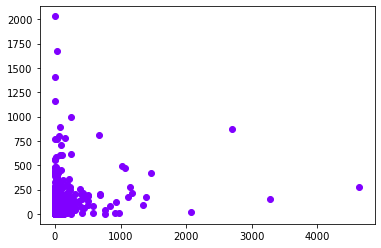

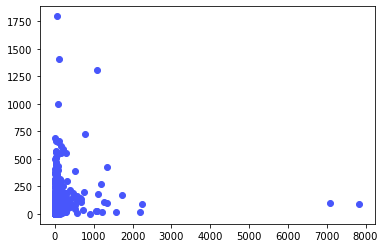

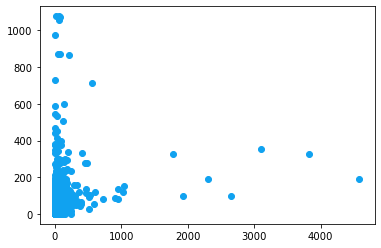

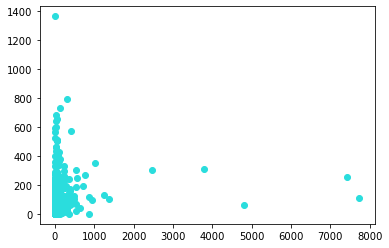

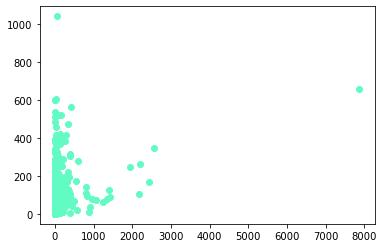

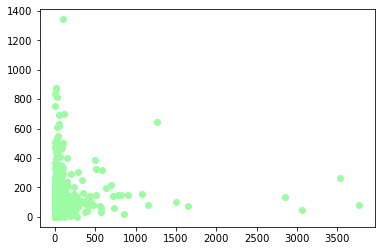

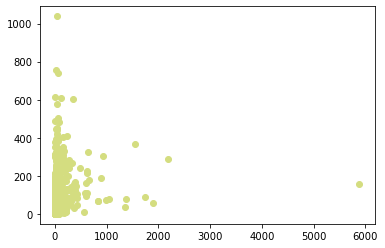

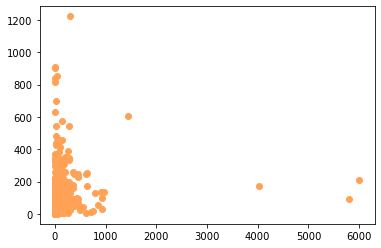

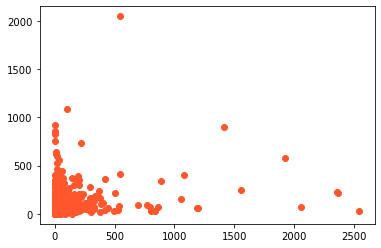

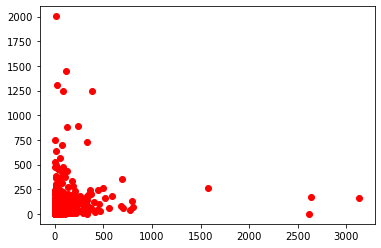

In [24]:
from matplotlib import pyplot as plt
import matplotlib.cm as cm

colors = cm.rainbow(np.linspace(0, 1, num_folds))

for fold in range(num_folds):
    plt.scatter(tests[fold], predictions[fold], color=colors[fold])
    plt.show()

In [25]:
from scipy.stats import spearmanr

for fold in range(num_folds):
    ss = spearmanr(predictions[fold], tests[fold])
    print('spearman, fold %d: %f' % (fold, ss.correlation))

s = spearmanr(all_tests, all_predictions)
print('total spearman: %f' % s.correlation)

spearman, fold 0: 0.693775
spearman, fold 1: 0.707398
spearman, fold 2: 0.701649
spearman, fold 3: 0.704864
spearman, fold 4: 0.703197
spearman, fold 5: 0.706822
spearman, fold 6: 0.701509
spearman, fold 7: 0.708097
spearman, fold 8: 0.680534
spearman, fold 9: 0.691376
total spearman: 0.699816


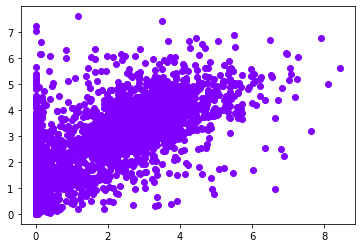

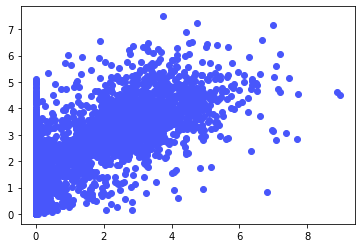

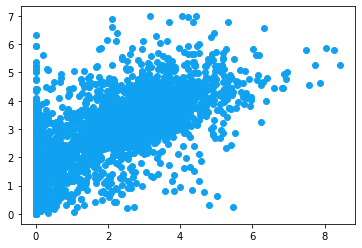

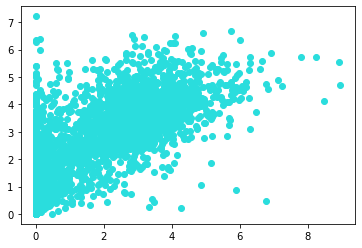

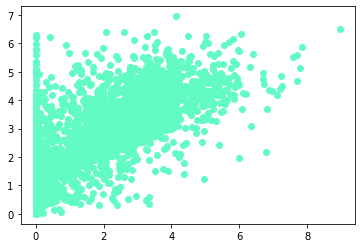

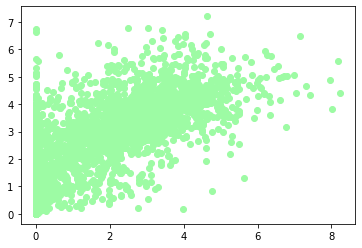

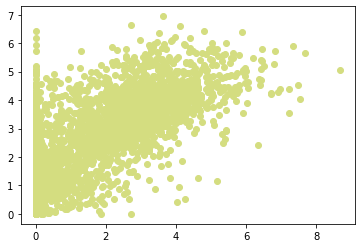

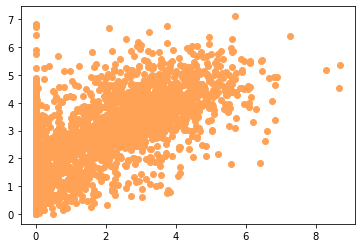

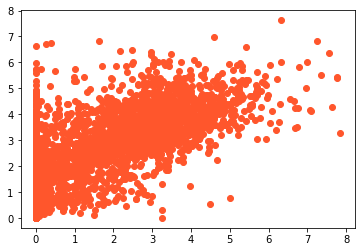

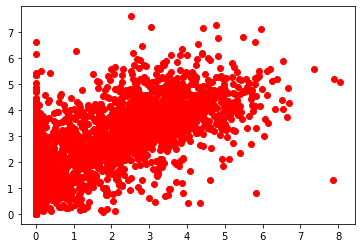

In [26]:
colors = cm.rainbow(np.linspace(0, 1, num_folds))

for fold in range(num_folds):
    plt.scatter(np.log(1+tests[fold]), np.log(1+predictions[fold]), color=colors[fold])
    plt.show()

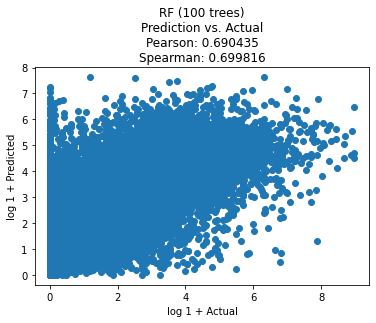

In [27]:
cc = np.corrcoef(np.log(1+all_tests), np.log(1+all_predictions))
ss = spearmanr(all_tests, all_predictions)

plt.scatter(np.log(1+all_tests), np.log(1+all_predictions))
plt.xlabel('log 1 + Actual')
plt.ylabel('log 1 + Predicted')
plt.title('RF (100 trees)\nPrediction vs. Actual\nPearson: %f\nSpearman: %f' % (cc[0,1], ss.correlation))
plt.show()

In [112]:
from sklearn.ensemble import RandomForestClassifier

fold = 0
x_train = leaf_x.loc[train_indices[fold], :]
y_train = leaf_y.loc[train_indices[fold]]
y_train[y_train != 0] = 1


x_test = leaf_x.loc[test_indices[fold], :]
y_test = leaf_y.loc[test_indices[fold]]
y_test[y_test != 0] = 1


rfm = RandomForestClassifier()
rfm = rfm.fit(x_train, y_train)
predicted = rfm.predict(x_test)

In [116]:
y_test_0_cnt = sum(y_test == 0)
y_test_1_cnt = sum(y_test == 1)

predicted_0_cnt = sum(predicted == 0)
predicted_1_cnt = sum(predicted == 1)

disc = sum(predicted != y_test)
agre = sum(predicted == y_test)

print('y0: %d, y1: %d\np0: %d, p1: %d\nagreement: %d, discrepancy: %d' % (y_test_0_cnt, y_test_1_cnt, predicted_0_cnt, predicted_1_cnt, agre, disc))

y0: 479, y1: 2237
p0: 346, p1: 2370
agreement: 2417, discrepancy: 299


In [10]:
import numpy as np

from sklearn import linear_model

linear_tests = []
linear_predictions = []

for fold in range(num_folds):
    print('fold %d...' % fold)
    x_train = np.log(1+leaf_x.loc[train_indices[fold], :])
    y_train = np.log(1+leaf_y.loc[train_indices[fold]])

    x_test = np.log(1+leaf_x.loc[test_indices[fold], :])
    y_test = np.log(1+leaf_y.loc[test_indices[fold]])
    
    lm = linear_model.LinearRegression()
    lm = lm.fit(x_train, y_train)
    predicted = lm.predict(x_test)
    linear_predictions.append(predicted)
    linear_tests.append(y_test)

fold 0...
fold 1...
fold 2...
fold 3...
fold 4...
fold 5...
fold 6...
fold 7...
fold 8...
fold 9...


In [11]:
from scipy.stats import spearmanr

for fold in range(num_folds):
    ss = spearmanr(linear_predictions[fold], linear_tests[fold])
    print('spearman, fold %d: %f' % (fold, ss.correlation))

all_linear_tests = pd.concat(linear_tests)
all_linear_predictions = np.concatenate(linear_predictions)

s = spearmanr(all_linear_tests, all_linear_predictions)
print('total spearman: %f' % s.correlation)

spearman, fold 0: 0.766829
spearman, fold 1: 0.763703
spearman, fold 2: 0.768274
spearman, fold 3: 0.772210
spearman, fold 4: 0.775373
spearman, fold 5: 0.789881
spearman, fold 6: 0.771450
spearman, fold 7: 0.775634
spearman, fold 8: 0.774723
spearman, fold 9: 0.781042
total spearman: 0.774025


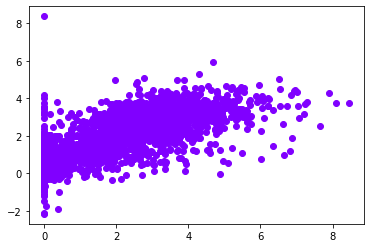

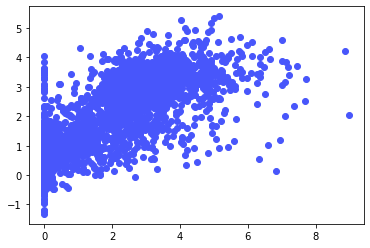

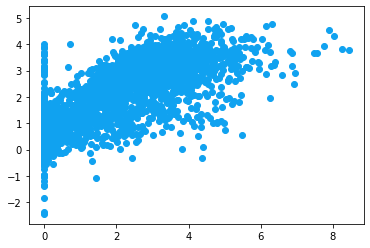

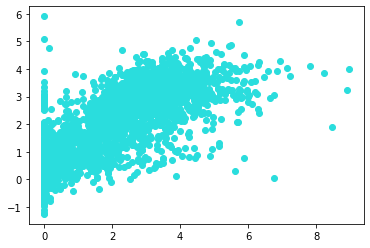

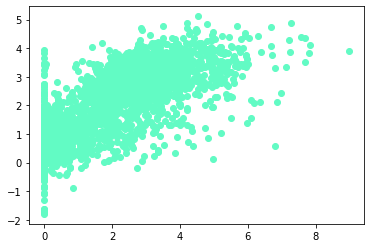

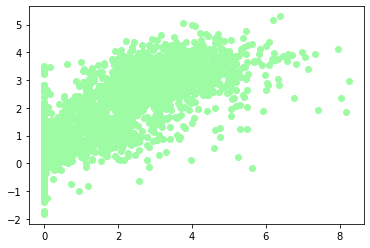

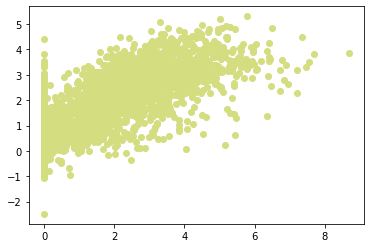

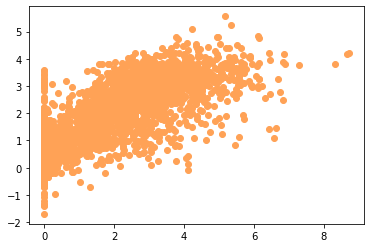

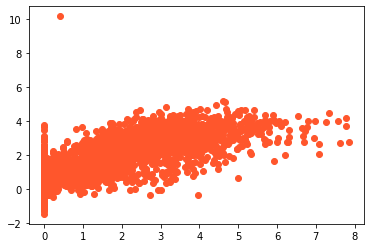

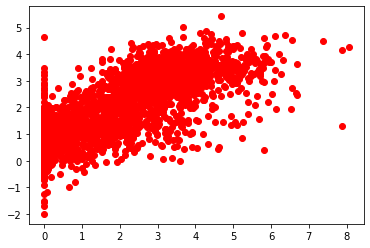

In [12]:
from matplotlib import pyplot as plt
import matplotlib.cm as cm

colors = cm.rainbow(np.linspace(0, 1, num_folds))

for fold in range(num_folds):
    plt.scatter(linear_tests[fold], linear_predictions[fold], color=colors[fold])
    plt.show()

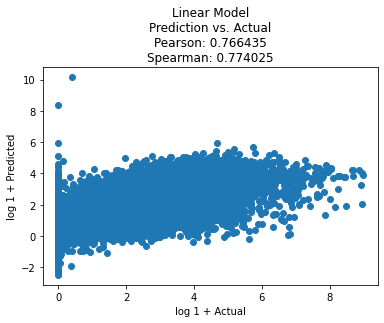

In [13]:
cc = np.corrcoef(all_linear_tests, all_linear_predictions)
ss = spearmanr(all_linear_tests, all_linear_predictions)

plt.scatter(all_linear_tests, all_linear_predictions)
plt.xlabel('log 1 + Actual')
plt.ylabel('log 1 + Predicted')
plt.title('Linear Model\nPrediction vs. Actual\nPearson: %f\nSpearman: %f' % (cc[0,1], ss.correlation))
plt.show()

fold 0...
fold 1...
fold 2...
fold 3...
fold 4...
fold 5...
fold 6...
fold 7...
fold 8...
fold 9...


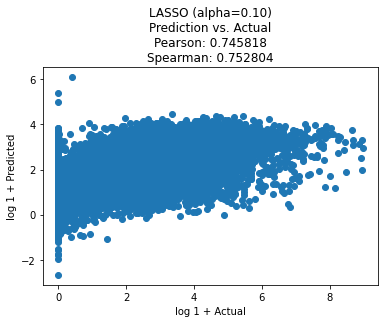

fold 0...
fold 1...
fold 2...
fold 3...
fold 4...
fold 5...
fold 6...
fold 7...
fold 8...
fold 9...


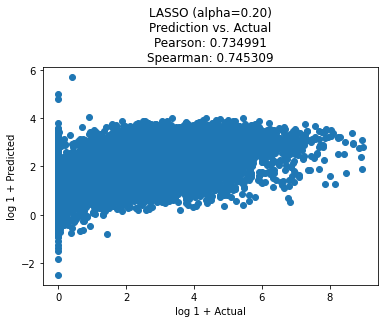

fold 0...
fold 1...
fold 2...
fold 3...
fold 4...
fold 5...
fold 6...
fold 7...
fold 8...
fold 9...


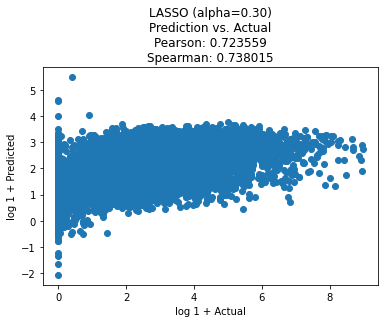

fold 0...
fold 1...
fold 2...
fold 3...
fold 4...
fold 5...
fold 6...
fold 7...
fold 8...
fold 9...


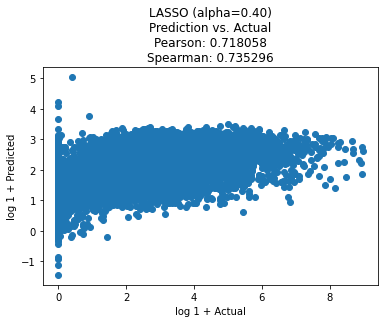

fold 0...
fold 1...
fold 2...
fold 3...
fold 4...
fold 5...
fold 6...
fold 7...
fold 8...
fold 9...


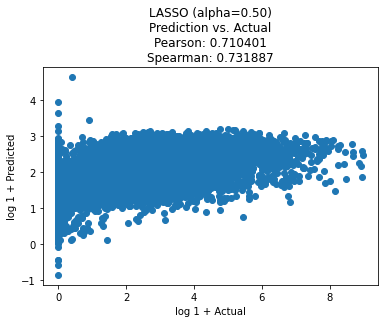

fold 0...
fold 1...
fold 2...
fold 3...
fold 4...
fold 5...
fold 6...
fold 7...
fold 8...
fold 9...


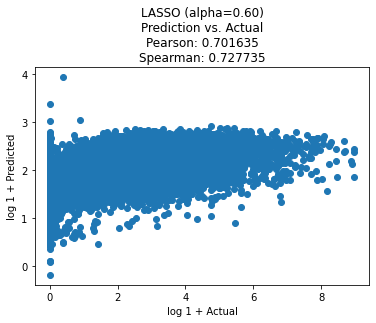

fold 0...
fold 1...
fold 2...
fold 3...
fold 4...
fold 5...
fold 6...
fold 7...
fold 8...
fold 9...


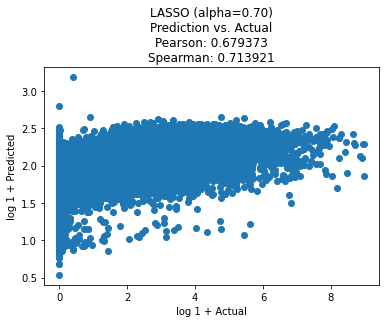

fold 0...
fold 1...
fold 2...
fold 3...
fold 4...
fold 5...
fold 6...
fold 7...
fold 8...
fold 9...


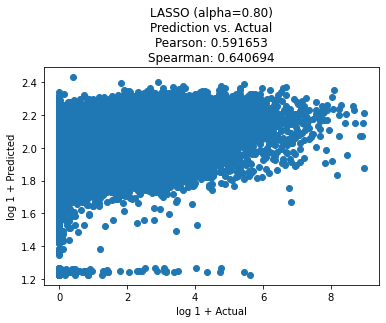

fold 0...
fold 1...
fold 2...
fold 3...
fold 4...
fold 5...
fold 6...
fold 7...
fold 8...
fold 9...


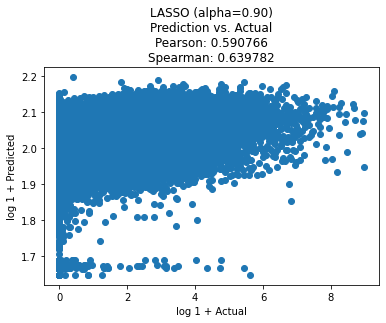

fold 0...
fold 1...
fold 2...
fold 3...
fold 4...
fold 5...
fold 6...
fold 7...
fold 8...
fold 9...


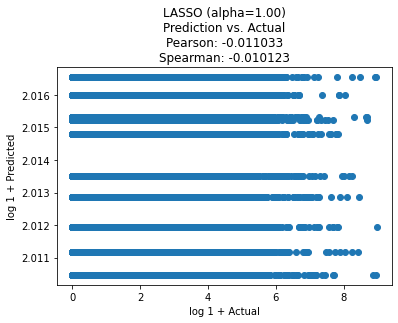

In [20]:
alphas = [0.1*i for i in range(11)]

for alpha in alphas[1:]:
    lasso_tests = []
    lasso_predictions = []

    for fold in range(num_folds):
        print('fold %d...' % fold)
        x_train = np.log(1+leaf_x.loc[train_indices[fold], :])
        y_train = np.log(1+leaf_y.loc[train_indices[fold]])

        x_test = np.log(1+leaf_x.loc[test_indices[fold], :])
        y_test = np.log(1+leaf_y.loc[test_indices[fold]])

        lm = linear_model.Lasso(alpha=alpha)
        lm = lm.fit(x_train, y_train)
        predicted = lm.predict(x_test)
        lasso_predictions.append(predicted)
        lasso_tests.append(y_test)
    
    all_lasso_tests = pd.concat(lasso_tests)
    all_lasso_predictions = np.concatenate(lasso_predictions)
    
    cc = np.corrcoef(all_lasso_tests, all_lasso_predictions)
    ss = spearmanr(all_lasso_tests, all_lasso_predictions)

    plt.scatter(all_lasso_tests, all_lasso_predictions)
    plt.xlabel('log 1 + Actual')
    plt.ylabel('log 1 + Predicted')
    plt.title('LASSO (alpha=%.2f)\nPrediction vs. Actual\nPearson: %f\nSpearman: %f' % (alpha, cc[0,1], ss.correlation))
    plt.show()

In [28]:
fold = 0

x_train = leaf_x.loc[train_indices[fold], :]
y_train = leaf_y.loc[train_indices[fold]]

x_test = leaf_x.loc[test_indices[fold], :]
y_test = leaf_y.loc[test_indices[fold]]

rfm = RandomForestRegressor(n_estimators=1000)
rfm = rfm.fit(x_train, y_train)
predicted = rfm.predict(x_test)

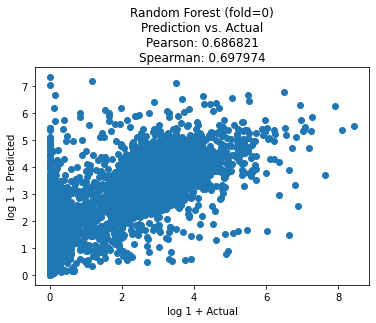

In [29]:
cc = np.corrcoef(np.log(1+y_test), np.log(1+predicted))
ss = spearmanr(np.log(1+y_test), np.log(1+predicted))

plt.scatter(np.log(1+y_test), np.log(1+predicted))
plt.xlabel('log 1 + Actual')
plt.ylabel('log 1 + Predicted')
plt.title('Random Forest (fold=0)\nPrediction vs. Actual\nPearson: %f\nSpearman: %f' % (cc[0,1], ss.correlation))
plt.show()